# Random Forests (RF) with Solar Power Ramp Events

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Importing the dataset

In [6]:
os.getcwd()
os.chdir('../datasets')
# dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.read_csv('rampdata66.csv')
# X = dataset.iloc[:, [2, 3]].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 66].values
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V58,V59,V60,V61,V62,V63,V64,V65,V66,Class
0,0.001610,0.001852,0.445164,0.710982,0.482693,0.346400,0.786719,0.296912,0.212884,0.414958,...,4,2,2,2,2,2,1,2,2,4
1,0.127630,0.085961,0.548310,0.907729,0.999993,0.607910,0.184483,0.370349,0.051022,0.696017,...,2,2,2,2,2,4,4,2,2,2
2,0.034725,0.109288,0.510308,0.922363,0.999993,0.598586,0.159467,0.365388,0.054600,0.720091,...,2,2,2,2,2,2,2,2,2,2
3,0.033372,0.276992,0.473963,0.927030,0.999993,0.604930,0.140143,0.369037,0.092530,0.730662,...,4,4,4,2,2,2,2,2,4,4
4,0.171606,0.153857,0.456074,0.928770,0.999993,0.595534,0.121081,0.371288,0.086637,0.736614,...,2,4,4,2,2,2,2,4,4,4


## Encoding categorical data

In [7]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[ : , 1] = labelencoder_X.fit_transform(X[ : , 1])
# X

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Cross-validation for RF: 
Fitting 2 folds for each of 80 candidates, totalling 160 fits,  (it takes time about < 5mins)

https://scikit-learn.org/stable/modules/model_evaluation.html
{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}

In [12]:
# from sklearn import metrics   ##Additional scklearn functions
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV   #Perforing grid search

# from sklearn.ensemble import RandomForestClassifier
# RF_model = RandomForestClassifier(criterion = 'entropy', random_state=0)

# test_params = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[2,4,8,12], 'min_samples_split':[2, 3, 4, 5]}

# grid = GridSearchCV(estimator = RF_model, param_grid = test_params, n_jobs=4, 
#                     scoring='f1_weighted',cv=2, verbose=3)

# grid.fit(X_train,y_train)
# print(grid.best_params_)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:  1.8min finished


{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}


### Fitting Random Forest to the Training set

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# params={n_estimators = 10, criterion = 'entropy', random_state = 0}
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 5}
# params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 3}
params={'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}

classifier = RandomForestClassifier(**params, criterion = 'entropy', random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 16,  18,   0,   0],
       [  6, 277,   0,  32],
       [  0,   0,   2,   5],
       [  0,  56,   0, 545]], dtype=int64)

In [21]:
import pandas as pd
import datetime as dt
df_fs=pd.DataFrame(dataset.columns)
dataset.columns
# df_fs

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'Class'],
      dtype='object')

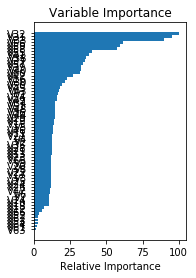

In [19]:
# #############################################################################
# Plot feature importance
feature_importance = classifier.feature_importances_
## make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, dataset.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [59]:
sorted_idx
# feature_importance[sorted_idx]
# feature_importance[sorted_idx[64]]
# feature_importance[sorted_idx[65]]

array([62, 60, 63, 52, 61, 51, 65, 11, 17,  9, 13,  6,  5, 46, 25, 23, 24,
        2, 16, 21,  7, 19,  8, 64, 22, 12, 20, 27, 34,  1,  3, 26, 10, 45,
        4, 14, 18, 28, 43, 35, 47, 50, 33, 48, 53,  0, 42, 44, 49, 29, 15,
       41, 59, 39, 38, 56, 36, 37, 40, 54, 57, 58, 55, 32, 30, 31],
      dtype=int64)

In [20]:
from sklearn.metrics import f1_score
# f1_score(y_test, y_pred, average='macro')  
# f1_score(y_test, y_pred, average='micro')  
# f1_score(y_test, y_pred, average='weighted')  
f1_score(y_test, y_pred, average=None)

array([0.57142857, 0.83183183, 0.44444444, 0.92138631])

## Analysis on the outcomes y, (classes of solar ramp events)

In [57]:
y.shape
len(y)
print('C1=', len(y[y==1]),'C2=', len(y[y==2]),
      'C3=', len(y[y==3]),'C4=', len(y[y==4]))

C1= 131 C2= 1290 C3= 31 C4= 2376
